In [ ]:
#!pip install langdetect
#!pip install stopwordsiso
#nltk.download("stopwords")
#!pip install googletrans==4.0.0-rc1
#!pip install deep-translator
#!pip install spacy

In [74]:
#archivo = "C:/Users/laura/Downloads/Popular/popus.txt"
#archivo = "C:/Users/laura/Downloads/Popular/unpopus.txt"

In [1]:
import stopwordsiso as stopwords
import collections
import string
from langdetect import detect, DetectorFactory
from deep_translator import GoogleTranslator
import time
import random
import json

## Traducción y análisis

In [18]:
archivo = "C:/Users/laura/Downloads/Popular/unpopus_Mar2025.txt"
json_output = "unpopus_Mar2025_traducidas.json"
MAX_CHAR = 4500  # Límite de caracteres por traducción
WORD_LIMIT = 10  # Máximo de veces que una palabra puede contar en una canción

# Función para dividir texto en fragmentos menores a 5000 caracteres
def split_text(text, max_length=MAX_CHAR):
    return [text[i : i + max_length] for i in range(0, len(text), max_length)]
    
# Leer archivo
with open(archivo, "r", encoding="utf-8", errors="ignore") as file:
    text = file.read().lower()

# Separar canciones
songs = text.split("---------------------------------------------------")

# Diccionario para almacenar canciones por idioma detectado
dic = {}
song_count = 0  # Contador de canciones procesadas

# Traducir canciones y guardarlas en JSON estructurado
for idx, song in enumerate(songs):
    try:
        song = song.strip()
        lang = detect(song)  # Detecta el idioma

        # Dividir en fragmentos si es muy larga
        fragments = split_text(song)
        translated_fragments = [
            GoogleTranslator(source="auto", target="en").translate(frag)
            for frag in fragments
        ]
        traduccion = " ".join(translated_fragments)  # Unir fragmentos traducidos

        # Guardar en diccionario con identificador de canción
        if lang not in dic:
            dic[lang] = []
        dic[lang].append({"id": idx + 1, "translated": traduccion})

        song_count += 1
        print(f"Procesadas {song_count} canciones...")  # Mostrar progreso en pantalla
        time.sleep(random.uniform(5, 10))  # Evita bloqueos por demasiadas peticiones
        

    except Exception as e:
        print(f"Error procesando una canción: {e}")
        continue

# Guardar en JSON
with open(json_output, "w", encoding="utf-8") as f:
    json.dump(dic, f, ensure_ascii=False, indent=4)

print("Traducciones guardadas en JSON.")

Procesadas 1 canciones...
Procesadas 2 canciones...
Procesadas 3 canciones...
Procesadas 4 canciones...
Procesadas 5 canciones...
Procesadas 6 canciones...
Procesadas 7 canciones...
Procesadas 8 canciones...
Procesadas 9 canciones...
Procesadas 10 canciones...
Procesadas 11 canciones...
Procesadas 12 canciones...
Procesadas 13 canciones...
Procesadas 14 canciones...
Procesadas 15 canciones...
Procesadas 16 canciones...
Procesadas 17 canciones...
Procesadas 18 canciones...
Procesadas 19 canciones...
Procesadas 20 canciones...
Procesadas 21 canciones...
Procesadas 22 canciones...
Procesadas 23 canciones...
Procesadas 24 canciones...
Procesadas 25 canciones...
Procesadas 26 canciones...
Procesadas 27 canciones...
Procesadas 28 canciones...
Procesadas 29 canciones...
Procesadas 30 canciones...
Procesadas 31 canciones...
Procesadas 32 canciones...
Procesadas 33 canciones...
Procesadas 34 canciones...
Procesadas 35 canciones...
Procesadas 36 canciones...
Procesadas 37 canciones...
Procesadas

In [3]:
# Configuración
json_output = "2025_popus_traducidas.json"
WORD_LIMIT = 10  

# --- Cargar traducciones desde JSON ---
try:
    with open(json_output, "r", encoding="utf-8") as f:
        dic = json.load(f)
except FileNotFoundError:
    print(f"Error: No se encontró el archivo {json_output}.")
    exit()
    
# --- Análisis de palabras más comunes ---
word_counter = collections.Counter()
stop_words = stopwords.stopwords("en")


for lang, songs in dic.items():
    for song_data in songs:
        song_words = song_data["translated"].split()
        song_words = [word.strip(string.punctuation).lower() for word in song_words if word.isalpha()]  # Quitar puntuación
        filtered_words = [word for word in song_words if word not in stop_words]
        unique_counts = collections.Counter(filtered_words)
        
        # Aplicar límite de repeticiones por palabra
        for word, count in unique_counts.items():
            word_counter[word] += min(count, WORD_LIMIT)

# Mostrar las 20 palabras más comunes
print("\n Las palabras más comunes en canciones populares (con límite de repeticiones):")
for word, count in word_counter.most_common(50):
    print(f"{word}: {count}")


 Las palabras más comunes en canciones populares (con límite de repeticiones):
love: 392
wanna: 263
time: 227
feel: 191
yeah: 166
baby: 159
life: 126
heart: 118
night: 106
day: 91
girl: 76
gonna: 74
hit: 72
fuck: 70
hold: 69
gotta: 66
shit: 65
head: 65
hard: 64
dance: 62
tonight: 61
eyes: 60
mind: 57
hear: 56
kiss: 56
bad: 55
break: 55
feeling: 54
told: 54
real: 53
tryna: 52
stay: 51
times: 50
crazy: 47
fall: 47
leave: 47
live: 45
watch: 45
start: 44
hands: 43
talk: 41
bitch: 41
falling: 41
left: 40
hand: 40
ooh: 40
play: 39
save: 38
thinking: 37
bring: 36



Las palabras más comunes en canciones populares y no populares:
love: 3971
time: 2214
wanna: 1920
yeah: 1911
feel: 1569
baby: 1529
night: 1127
life: 1091
day: 1000
fuck: 951
heart: 947
shit: 844
mind: 833
gonna: 830
leave: 745
girl: 726
gotta: 687
hard: 666
bitch: 660
bad: 657
stay: 606
dance: 603
nigga: 598
niggas: 576
hit: 574
hold: 559
told: 554
money: 549
left: 539
eyes: 539
head: 520
talk: 514
real: 509
body: 503
crazy: 497
tonight: 492
kiss: 490
fall: 490
tryna: 481
play: 472
break: 459
care: 436
walk: 430
forget: 429
live: 421
feeling: 410
hear: 403
friends: 391
bring: 390
lost: 386


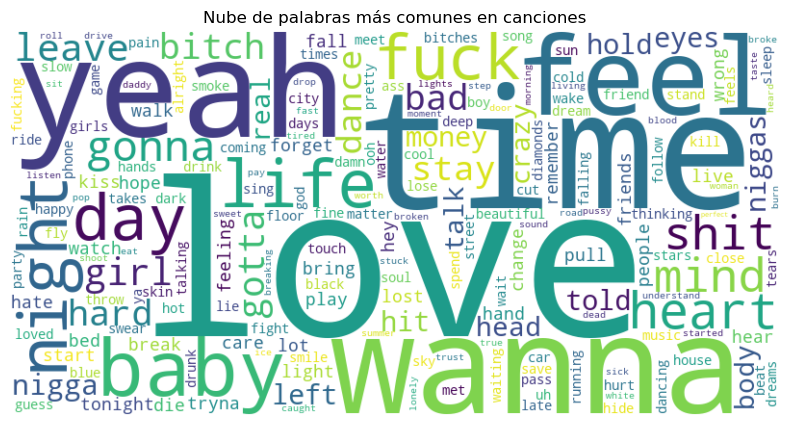

In [7]:
import json
import collections
import string
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from stopwordsiso import stopwords

# Configuración
YEARS = [2018, 2019, 2021, 2023, 2024, 2025]
CATEGORIES = ["popus", "unpopus"]  # Ajuste en los nombres de categorías
WORD_LIMIT = 10  # Límite de repeticiones por palabra
TOP_WORDS = 50  # Número de palabras a mostrar en el gráfico

# Inicializar contador de palabras global
word_counter = collections.Counter()
stop_words = stopwords("en")

# Procesar cada archivo JSON
def process_json_file(filename):
    try:
        with open(filename, "r", encoding="utf-8") as f:
            dic = json.load(f)
    except FileNotFoundError:
        print(f"Error: No se encontró el archivo {filename}.")
        return
    
    # Contar palabras
    for lang, songs in dic.items():
        for song_data in songs:
            song_words = song_data["translated"].split()
            song_words = [word.strip(string.punctuation).lower() for word in song_words if word.isalpha()]
            filtered_words = [word for word in song_words if word not in stop_words]
            unique_counts = collections.Counter(filtered_words)
            
            for word, count in unique_counts.items():
                word_counter[word] += min(count, WORD_LIMIT)

# Leer todos los archivos
for year in YEARS:
    for category in CATEGORIES:
        filename = f"{year}_{category}_traducidas.json"  # Ajuste en el patrón del nombre del archivo
        process_json_file(filename)

# Mostrar las palabras más comunes
print("\nLas palabras más comunes en canciones populares y no populares:")
for word, count in word_counter.most_common(TOP_WORDS):
    print(f"{word}: {count}")

# Generar gráfico de nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_counter)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Nube de palabras más comunes en canciones")
plt.show()


In [16]:
"""
from nltk.corpus import stopwords

# Configuración
json_output = "popus_Mar2025_traducidas.json"
WORD_LIMIT = 10  

# --- Cargar traducciones desde JSON ---
try:
    with open(json_output, "r", encoding="utf-8") as f:
        dic = json.load(f)
except FileNotFoundError:
    print(f"Error: No se encontró el archivo {json_output}.")
    exit()

# --- Análisis de palabras más comunes ---
word_counter = collections.Counter()
stop_words = set(stopwords.words("english"))

for lang, songs in dic.items():
    for song_data in songs:
        song_words = song_data["translated"].split()
        song_words = [
            word.strip(string.punctuation).lower() 
            for word in song_words 
            if word.isalpha()
        ]  # Quitar puntuación y filtrar palabras
        filtered_words = [word for word in song_words if word not in stop_words]
        unique_counts = collections.Counter(filtered_words)
        
        # Aplicar límite de repeticiones por palabra
        for word, count in unique_counts.items():
            word_counter[word] += min(count, WORD_LIMIT)

# Mostrar las 50 palabras más comunes
print("\nLas palabras más comunes en canciones populares (con límite de repeticiones):")
for word, count in word_counter.most_common(50):
    print(f"{word}: {count}")
"""

'\nfrom nltk.corpus import stopwords\n\n# Configuración\njson_output = "popus_Mar2025_traducidas.json"\nWORD_LIMIT = 10  \n\n# --- Cargar traducciones desde JSON ---\ntry:\n    with open(json_output, "r", encoding="utf-8") as f:\n        dic = json.load(f)\nexcept FileNotFoundError:\n    print(f"Error: No se encontró el archivo {json_output}.")\n    exit()\n\n# --- Análisis de palabras más comunes ---\nword_counter = collections.Counter()\nstop_words = set(stopwords.words("english"))\n\nfor lang, songs in dic.items():\n    for song_data in songs:\n        song_words = song_data["translated"].split()\n        song_words = [\n            word.strip(string.punctuation).lower() \n            for word in song_words \n            if word.isalpha()\n        ]  # Quitar puntuación y filtrar palabras\n        filtered_words = [word for word in song_words if word not in stop_words]\n        unique_counts = collections.Counter(filtered_words)\n        \n        # Aplicar límite de repeticiones po